In [1]:

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/card_transdata.csv")
print(df.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [3]:
df.shape

(1000000, 8)

In [4]:
df.describe()

distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000        0.000000   
50%                          0.997717         1.000000        0.000000   
75%                          2.096370         1.000000        1.000000   
max                        267.802942         1.000000        1.000000   

       used_pin_number    online_order           fraud  
count   1000000.000000  1000000.000000  1000000.000000  
mean          0.100608        0.650552        0.087403  
std           0.300809        0.476796        0.282425  
min           0.000000        0.000000        0.000000  
25%           0.000000        0.000000        0.000000  
50%           0.000000        1.000000        0.000000  
75%           0.000000        1.000000        0.000000  
max           1.000000        1.000000        1.000000

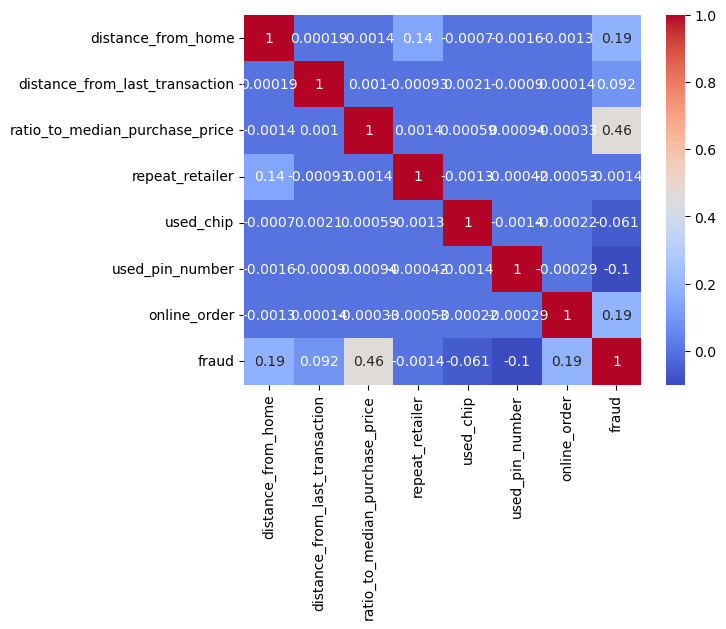

In [5]:
corr_matrix = df.corr()
# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

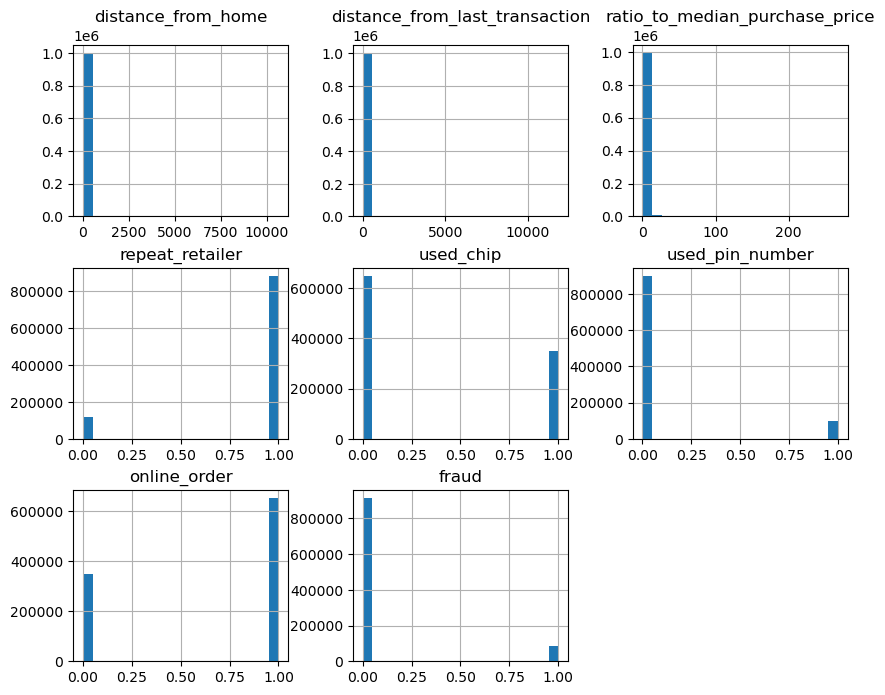

In [6]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(10, 8))
plt.show()

In [7]:
y = df['fraud']
X = MS(['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order']).fit_transform(df) 
#X = df.drop('fraud', axis='columns')
#X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

coef   std err        t  P>|t|
intercept                      -0.0541  0.001000  -68.166    0.0
distance_from_home              0.0008  0.000004  229.163    0.0
distance_from_last_transaction  0.0010  0.000009  109.958    0.0
ratio_to_median_purchase_price  0.0467  0.000084  556.705    0.0
repeat_retailer                -0.0258  0.001000  -35.097    0.0
used_chip                      -0.0364  0.000000  -73.917    0.0
used_pin_number                -0.0942  0.001000 -120.766    0.0
online_order                    0.1139  0.000000  231.369    0.0

In [8]:
# Perform regression
model = sm.OLS.from_formula('fraud ~ distance_from_home * distance_from_last_transaction', data=df)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  fraud   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                 1.529e+04
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:02:53   Log-Likelihood:            -1.3217e+05
No. Observations:             1000000   AIC:                         2.644e+05
Df Residuals:                  999996   BIC:                         2.644e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [9]:
# Perform regression with variable interactions
model = sm.OLS.from_formula('fraud ~ distance_from_last_transaction * ratio_to_median_purchase_price* distance_from_home* used_chip', data=df)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  fraud   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                 2.645e+04
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:19:11   Log-Likelihood:                 12463.
No. Observations:             1000000   AIC:                        -2.489e+04
Df Residuals:                  999984   BIC:                        -2.471e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [10]:
#Try the KNN model
# Select predictors (excluding the last column)
predictors = df.iloc[:, :-1]
# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())
# Create a random vector of True and False values
np.random.seed(4)
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# Define the training set for X (predictors)
training_X = predictors_standardized[split]

# Define the training set for Y (response)
training_Y = df.loc[split, 'fraud']

# Define the testing set for X (predictors)
testing_X = predictors_standardized[~split]

# Define the testing set for Y (response)
testing_Y = df.loc[~split, 'fraud']

   distance_from_home  distance_from_last_transaction  \
0            0.477882                       -0.182849   
1           -0.241607                       -0.188094   
2           -0.329369                       -0.163733   
3           -0.372854                        0.021806   
4            0.268572                       -0.172968   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        0.043491         0.366584   1.361576   
1                       -0.189300         0.366584  -0.734443   
2                       -0.498812         0.366584  -0.734443   
3                       -0.522048         0.366584   1.361576   
4                        0.142373         0.366584   1.361576   

   used_pin_number  online_order  
0        -0.334458     -1.364425  
1        -0.334458     -1.364425  
2        -0.334458      0.732909  
3        -0.334458      0.732909  
4        -0.334458      0.732909  


In [11]:
predictors

distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715              1.0        0.0   
3                             0.362663              1.0        1.0   
4                             2.222767              1.0        1.0   
...                                ...              ...        ...   
999995                        1.626798              1.0        1.0   
999996                        2.778303              1.0        1.0   
999997                        0.218075              1.0        1.0   
999998                        0.475822              1.0        0.0   
999999                        0.386920              1.0        1.0   

        used_pin_number  online_order  
0                   0.0           0.0  
1                   0.0           0.0  
2                   0.0           1.0  
3                   0.0           1.0  
4                   0.0           1.0  
...                 ...           ...  
999995              0.0           0.0  
999996              0.0           0.0  
999997              0.0           1.0  
999998              0.0           1.0  
999999              0.0           1.0  

[1000000 rows x 7 columns]

In [12]:
predictors_standardized

distance_from_home  distance_from_last_transaction  \
0                 0.477882                       -0.182849   
1                -0.241607                       -0.188094   
2                -0.329369                       -0.163733   
3                -0.372854                        0.021806   
4                 0.268572                       -0.172968   
...                    ...                             ...   
999995           -0.373473                       -0.190529   
999996           -0.103318                       -0.091035   
999997           -0.362650                       -0.137903   
999998           -0.342098                       -0.185523   
999999            0.481403                       -0.182579   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             0.043491         0.366584   1.361576   
1                            -0.189300         0.366584  -0.734443   
2                            -0.498812         0.366584  -0.734443   
3                            -0.522048         0.366584   1.361576   
4                             0.142373         0.366584   1.361576   
...                                ...              ...        ...   
999995                       -0.070505         0.366584   1.361576   
999996                        0.340808         0.366584   1.361576   
999997                       -0.573694         0.366584   1.361576   
999998                       -0.481628         0.366584  -0.734443   
999999                       -0.513384         0.366584   1.361576   

        used_pin_number  online_order  
0             -0.334458     -1.364425  
1             -0.334458     -1.364425  
2             -0.334458      0.732909  
3             -0.334458      0.732909  
4             -0.334458      0.732909  
...                 ...           ...  
999995        -0.334458     -1.364425  
999996        -0.334458     -1.364425  
999997        -0.334458      0.732909  
999998        -0.334458      0.732909  
999999        -0.334458      0.732909  

[1000000 rows x 7 columns]

In [14]:
knn = KNeighborsClassifier(n_neighbors =3)
knn_fit=knn.fit(training_X,training_Y)
knn_pred = knn.predict(testing_X)
confusion_table(knn_pred,testing_Y)

Truth         0.0    1.0
Predicted               
0.0        228985    195
1.0           116  21915

In [15]:
prediction_accuracy = knn.score(testing_X,testing_Y)
print(prediction_accuracy)

0.998761996887079


In [17]:
#Data is highly imbalanced
df.fraud.value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [19]:
#Liz: Trying random undersampling, reducing the samples of non-fraud to match that of fraud

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample

#Separate majority, minority class
df_majority = df[df['fraud']==0.0]
df_minority = df[df['fraud']==1.0]

#downsample majority "non-fraud" class
df_majority_downsampled = resample(df_majority, replace= False, n_samples=len(df_minority), random_state=42)

#combine downsampled majority + minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

#separate predictors (x) and target variable (y)
X_downsampled = df_downsampled.drop('fraud', axis=1)
y_downsampled = df_downsampled['fraud']


In [20]:
#split the downsampled dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.25, random_state=42)

#train a random forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[21873     1]
 [    0 21828]]


In [21]:
#calculate the accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.999977117752048


In [22]:
#Even after random undersampling, the accuracy still seems high at 99.99%.
#Let's check the class distribution after undersampling

print("Class distribution in training set:")
print(y_train.value_counts())

print("Class distribution in testing set")
print(y_test.value_counts())

Class distribution in training set:
fraud
1.0    65575
0.0    65529
Name: count, dtype: int64
Class distribution in testing set
fraud
0.0    21874
1.0    21828
Name: count, dtype: int64


In [24]:
#ROC AUC score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9999771418121972


In [ ]:
#Comparing with the original dataset KNN results, the original dataset has an accuracy of 99.87% while the undersampled dataset has an accuracy of 99.99%
#There might be an issue of potential overfitting.
